<div class="alert alert-block alert-success">
    <h1 align="center">Bike Sharing Demand Prediction Using MLR</h1>
</div>

## Importing the libraries

In [162]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

## Load and Prepare Data

In [278]:
df = pd.read_csv("train.csv")

## EDA

In [99]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
889,2011-03-01 12:00:00,1,0,1,1,12.30,15.150,39,8.9981,6,80,86
8941,2012-08-14 22:00:00,3,0,1,1,29.52,34.090,66,6.0032,28,161,189
803,2011-02-16 22:00:00,1,0,1,1,13.94,16.665,53,12.9980,12,61,73
3853,2011-09-11 13:00:00,3,0,0,1,30.34,34.090,58,7.0015,119,231,350
1272,2011-03-17 20:00:00,1,0,1,1,17.22,21.210,67,15.0013,25,112,137
8921,2012-08-14 02:00:00,3,0,1,2,27.88,31.820,83,12.9980,2,9,11
10382,2012-11-18 00:00:00,4,0,0,2,12.30,15.150,70,11.0014,11,118,129
9340,2012-09-12 13:00:00,3,0,1,1,28.70,31.820,34,8.9981,85,238,323
3018,2011-07-14 16:00:00,3,0,1,1,31.16,33.335,33,8.9981,43,231,274
2970,2011-07-12 16:00:00,3,0,1,1,35.26,39.395,44,19.0012,25,177,202


In [164]:
df.shape

(10886, 12)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [166]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [10]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [11]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [12]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [13]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [14]:
#Mean of total rentas
print('Average number of rented bikes in spring is :{:.2f} '.format(df[df['season'] == 1]['count'].mean()))
print('Average number of rented bikes in summer is :{:.2f} '.format(df[df['season'] == 2]['count'].mean()))
print('Average number of rented bikes in fall is :{:.2f} '.format(df[df['season'] == 3]['count'].mean()))
print('Average number of rented bikes in winter is :{:.2f} '.format(df[df['season'] == 4]['count'].mean()))

Average number of rented bikes in spring is :116.34 
Average number of rented bikes in summer is :215.25 
Average number of rented bikes in fall is :234.42 
Average number of rented bikes in winter is :198.99 


In [15]:
print('Min of count:',df['count'].min())
print('Max of count:',df['count'].max())

Min of count: 1
Max of count: 977


In [16]:
#Max count
df[df['count'] == 977]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977


In [23]:
#Min count
df[df['count'] == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
30,2011-01-02 07:00:00,1,0,0,2,16.40,20.455,76,12.9980,0,1,1
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
71,2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6884,2012-04-05 04:00:00,2,0,1,1,15.58,19.695,43,19.0012,0,1,1
7051,2012-04-12 04:00:00,2,0,1,1,12.30,14.395,61,15.0013,0,1,1
7433,2012-05-09 02:00:00,2,0,1,3,22.96,26.515,88,30.0026,0,1,1
10288,2012-11-14 02:00:00,4,0,1,1,9.84,10.605,60,19.9995,0,1,1


In [24]:
df[df['count'] == 1]['season'].value_counts(normalize=True)*100

1    72.380952
2    15.238095
4     8.571429
3     3.809524
Name: season, dtype: float64

In [25]:
#non-registered user
(df[df['casual'] == 0].shape[0]/df.shape[0])*100

9.05750505236083

In [26]:
#registered user
(df[df['registered'] == 0].shape[0]/df.shape[0])*100

0.1377916590115745

In [279]:
df['datetime'] = df['datetime'].astype('datetime64')

In [28]:
df['datetime'].dt.month.value_counts(normalize=True)*100

5     8.377733
6     8.377733
7     8.377733
8     8.377733
12    8.377733
10    8.368547
11    8.368547
4     8.350175
9     8.350175
2     8.276686
3     8.276686
1     8.120522
Name: datetime, dtype: float64

In [29]:
df['datetime'].dt.hour.value_counts(normalize=True)*100

12    4.188866
13    4.188866
22    4.188866
21    4.188866
20    4.188866
19    4.188866
18    4.188866
17    4.188866
16    4.188866
15    4.188866
14    4.188866
23    4.188866
11    4.179680
10    4.179680
9     4.179680
8     4.179680
7     4.179680
6     4.179680
0     4.179680
1     4.170494
5     4.152122
2     4.115378
4     4.060261
3     3.977586
Name: datetime, dtype: float64

In [30]:
df[df['count'] == 1]['datetime'].dt.month.value_counts(normalize=True)*100

2     26.666667
1     23.809524
3     21.904762
4     11.428571
12     5.714286
5      2.857143
9      1.904762
11     1.904762
6      0.952381
7      0.952381
8      0.952381
10     0.952381
Name: datetime, dtype: float64

In [31]:
print('Average number of rented bikes in Level 1 weather :{:.2f} '.format(df[df['weather'] == 1]['count'].mean()))
print('Average number of rented bikes in Level 2 weather :{:.2f} '.format(df[df['weather'] == 2]['count'].mean()))
print('Average number of rented bikes in Level 3 weather :{:.2f} '.format(df[df['weather'] == 3]['count'].mean()))
print('Average number of rented bikes in Level 4 weather :{:.2f} '.format(df[df['weather'] == 4]['count'].mean()))

Average number of rented bikes in Level 1 weather :205.24 
Average number of rented bikes in Level 2 weather :178.96 
Average number of rented bikes in Level 3 weather :118.85 
Average number of rented bikes in Level 4 weather :164.00 


In [32]:
df[df['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [33]:
df[df['weather'] == 3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
18,2011-01-01 18:00:00,1,0,0,3,17.22,21.210,88,16.9979,9,26,35
19,2011-01-01 19:00:00,1,0,0,3,17.22,21.210,88,16.9979,6,31,37
29,2011-01-02 06:00:00,1,0,0,3,17.22,21.210,77,19.9995,0,2,2
31,2011-01-02 08:00:00,1,0,0,3,16.40,20.455,71,15.0013,0,8,8
37,2011-01-02 14:00:00,1,0,0,3,14.76,17.425,76,12.9980,4,55,59
...,...,...,...,...,...,...,...,...,...,...,...,...
10808,2012-12-16 18:00:00,4,0,0,3,15.58,19.695,82,7.0015,8,99,107
10818,2012-12-17 04:00:00,4,0,1,3,14.76,18.940,100,0.0000,2,3,5
10830,2012-12-17 16:00:00,4,0,1,3,16.40,20.455,94,16.9979,15,287,302
10837,2012-12-17 23:00:00,4,0,1,3,17.22,21.210,94,15.0013,6,41,47


## Data Preprocessing

In [167]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [168]:
#No duplicated rows.
sum(df.duplicated())

0

In [280]:
def get_part_of_day(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [281]:
df['part_of_day'] = df['datetime'].dt.hour.apply(get_part_of_day)

In [282]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,part_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Late Night
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Late Night
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Late Night
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Late Night
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Late Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Eve
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Eve
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Night
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Night


In [283]:
#Convert type of categorical columns
category_col = ['season','holiday','workingday','weather', 'part_of_day']
df[category_col] = df[category_col].astype('category')

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  category      
 2   holiday      10886 non-null  category      
 3   workingday   10886 non-null  category      
 4   weather      10886 non-null  category      
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  count        10886 non-null  int64         
 12  part_of_day  10886 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(3), int64(4)
memory usage: 734.5 KB


In [115]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000


In [116]:
# Finding out the correlation between the features
corr = df.corr()
corr

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

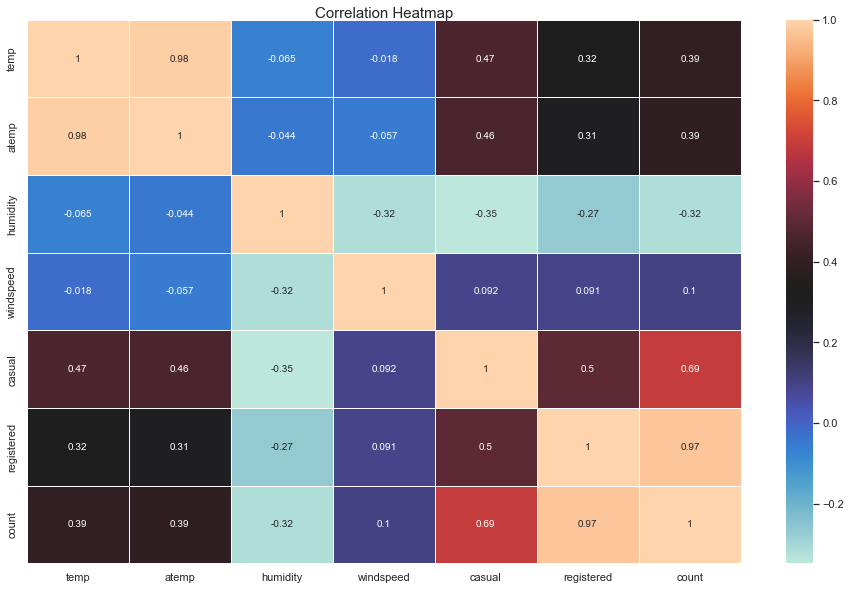

In [117]:
#Corrolation Cheking between numeric variables
plt.figure(figsize=(16,10))
Numeric = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
HeatMap=sns.heatmap(df[Numeric].corr(),annot=True,cmap=sns.color_palette("icefire", as_cmap=True),linewidths=0.5)
HeatMap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=2)

#### corr(temp, atemp) > 0.98, we should remove one of them

In [61]:
#High Corrolation between atemp and temp
df[['temp','atemp']]

,temp,atemp
0,9.84,14.395
1,9.02,13.635
2,9.02,13.635
3,9.84,14.395
4,9.84,14.395
...,...,...
10881,15.58,19.695
10882,14.76,17.425
10883,13.94,15.910
10884,13.94,17.425


In [285]:
#Drop unnecessary columns
df.drop(['atemp'],axis=1,inplace=True)
df.drop(['casual', 'registered'], axis=1, inplace=True)

In [286]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'count', 'part_of_day'],
      dtype='object')

## Strorytelling - Visualization

In [64]:
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
humidity               int64
windspeed            float64
count                  int64
weekend             category
dtype: object

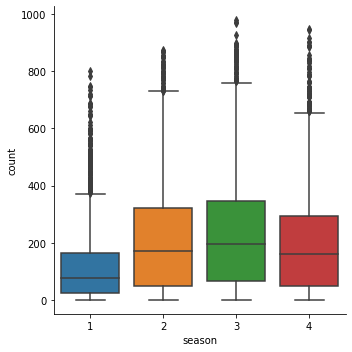

<Figure size 1152x720 with 0 Axes>

In [45]:
sns.catplot(x="season", y="count", kind="box", data=df)
plt.xticks()
plt.figure(figsize = (16,10))
plt.show()

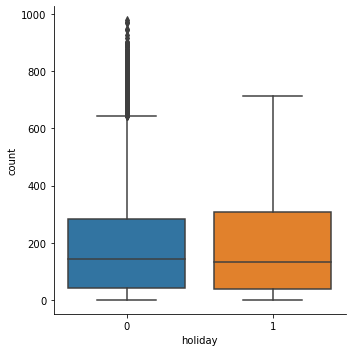

<Figure size 1152x720 with 0 Axes>

In [ ]:
sns.catplot(x="holiday", y="count", kind="box", data=df)
plt.xticks()
plt.figure(figsize = (16,10))
plt.show()

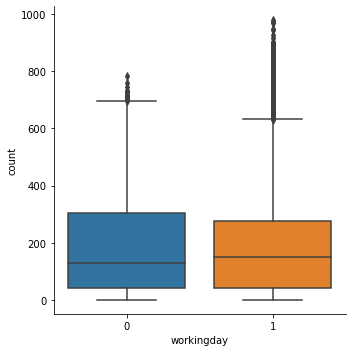

<Figure size 1152x720 with 0 Axes>

In [ ]:
sns.catplot(x="workingday", y="count", kind="box", data=df)
plt.xticks()
plt.figure(figsize = (16,10))
plt.show()

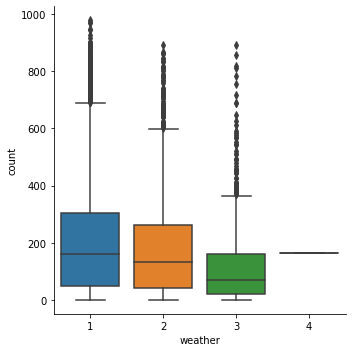

<Figure size 1152x720 with 0 Axes>

In [ ]:
sns.catplot(x="weather", y="count", kind="box", data=df)
plt.xticks()
plt.figure(figsize = (16,10))
plt.show()

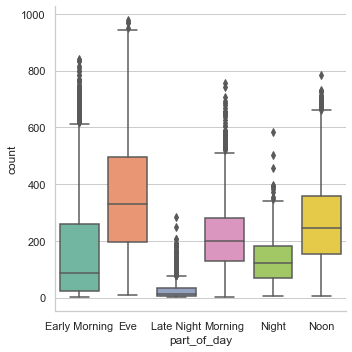

<Figure size 1152x720 with 0 Axes>

In [120]:
sns.catplot(x="part_of_day", y="count", kind="box", data=df)
plt.xticks()
plt.figure(figsize = (16,10))
plt.show()

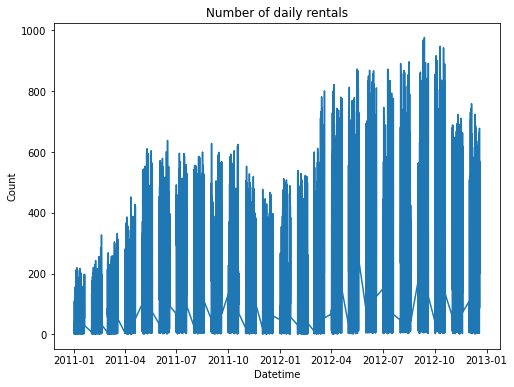

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df['datetime'], df['count'])
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.title('Number of daily rentals')
plt.show()

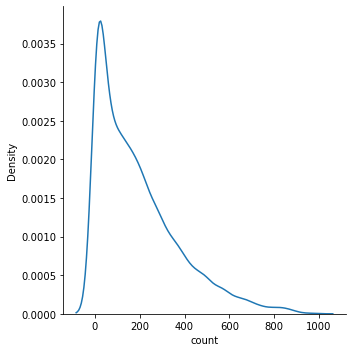

In [ ]:
sns.displot(df,x='count',kind='kde')

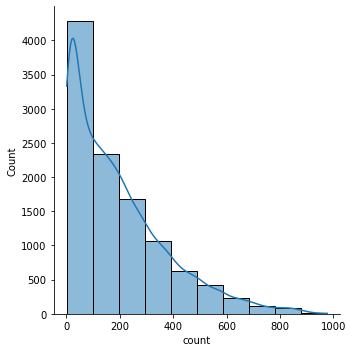

In [ ]:
sns.displot(x='count',kde=True,bins=10,data=df)

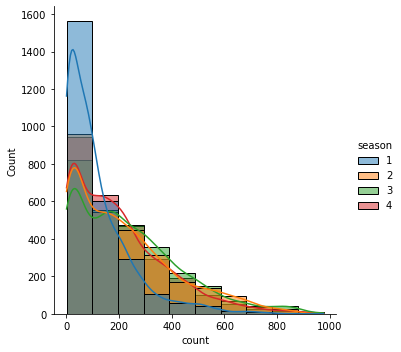

In [ ]:
sns.displot(x='count',kde=True,bins=10,data=df,hue='season')

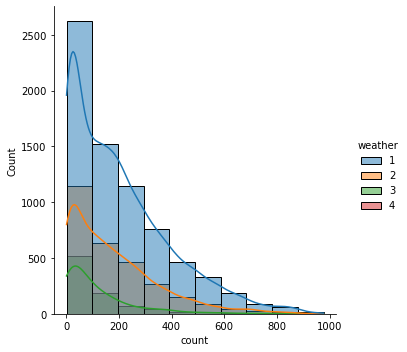

In [ ]:
sns.displot(x='count',kde=True,bins=10,data=df,hue='weather')

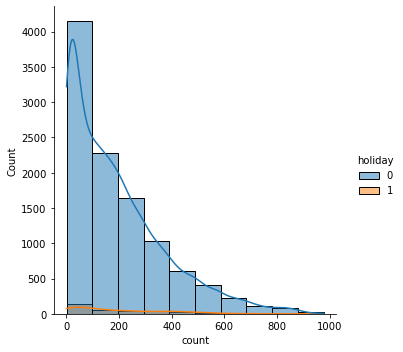

In [ ]:
sns.displot(x='count',kde=True,bins=10,data=df,hue='holiday')

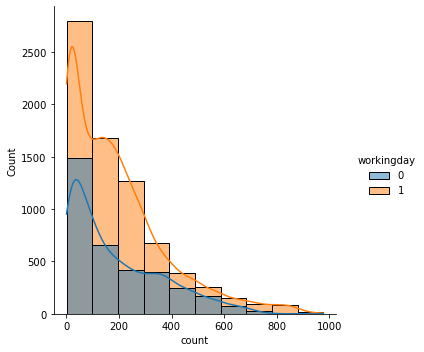

In [ ]:
sns.displot(x='count',kde=True,bins=10,data=df,hue='workingday')

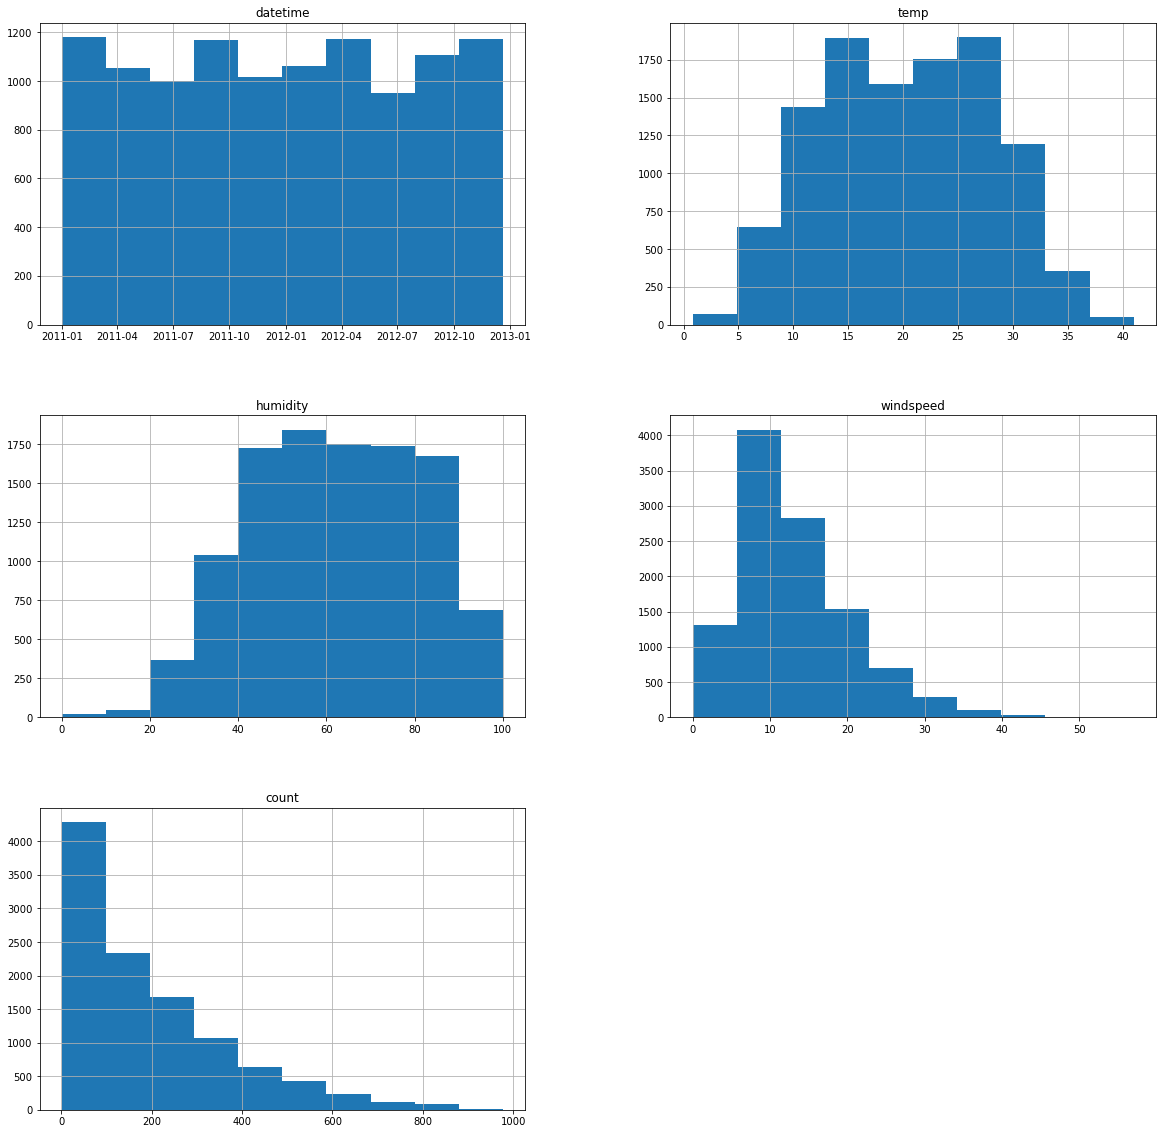

In [69]:
df.hist(figsize=(20,20))
plt.show()

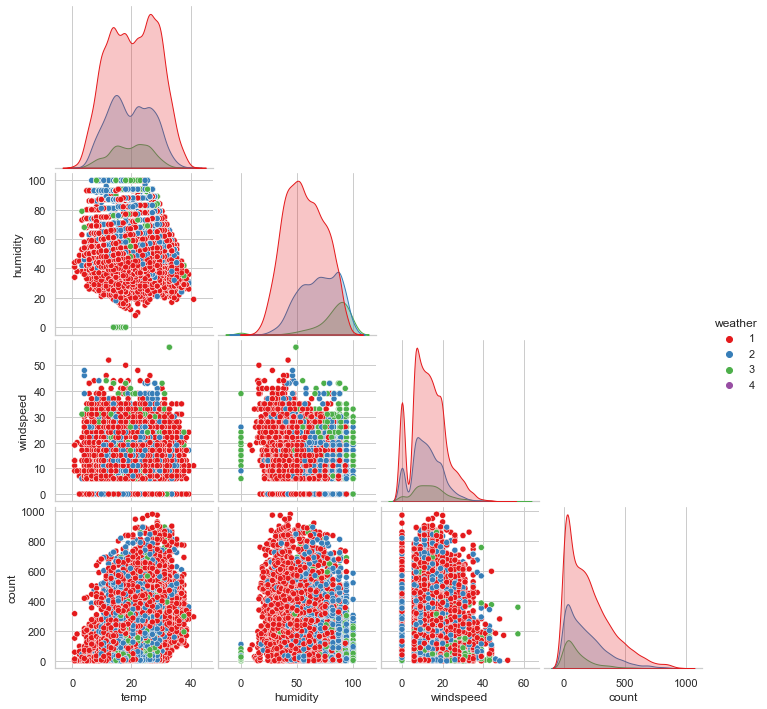

In [122]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(df, hue="weather",corner=True)
plt.show()

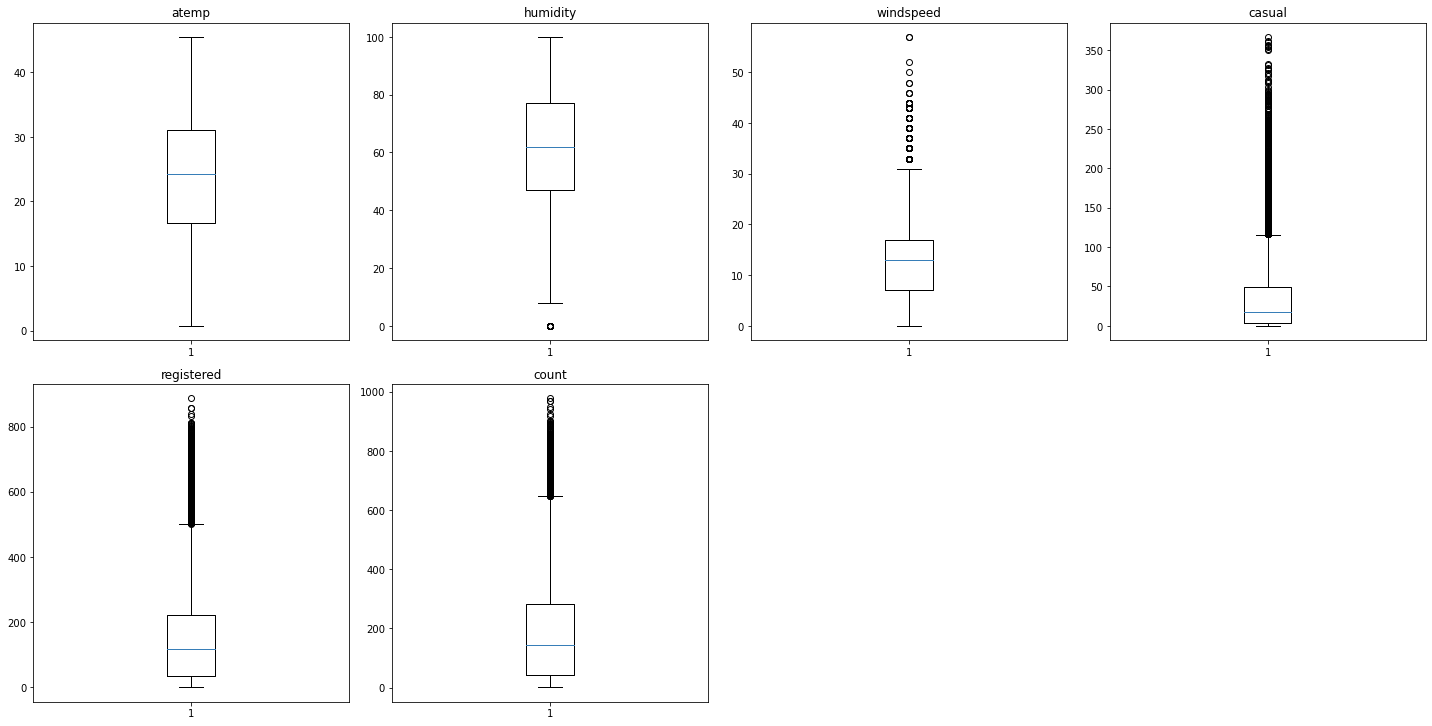

In [ ]:
#Outlier checking using box plot
plt.figure(figsize=(20,20))
Numeric = ['atemp', 'humidity','windspeed','casual','registered','count']
for i, variable in enumerate(Numeric):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

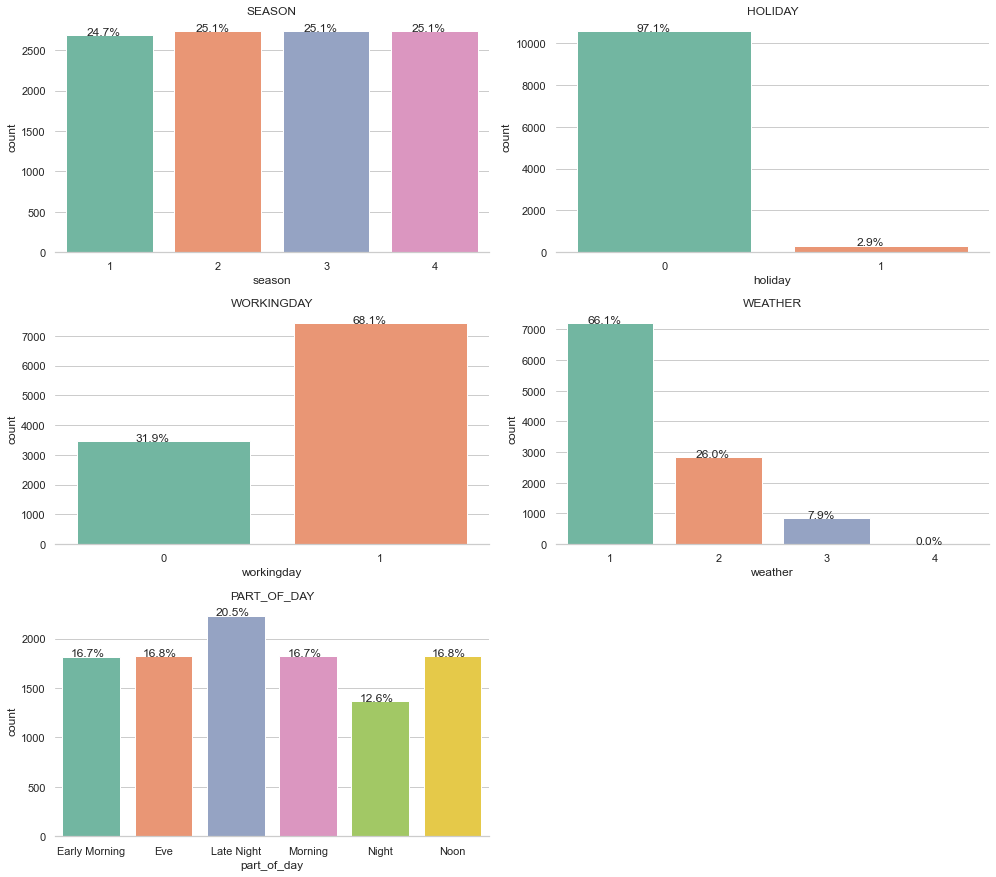

In [123]:
#Barchart of Categorical variables side by side
cat_columns = ['season','holiday','workingday','weather', 'part_of_day']
title=['Season','Holiday','WorkingDay','Weather', 'part_of_day']
plt.figure(figsize=(14,20))

sns.set_theme(style="whitegrid")

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df[variable].value_counts(ascending=False).index   
                     
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df[variable], data=df )
                     sns.despine(top=True,right=True,left=True) 
                     
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())


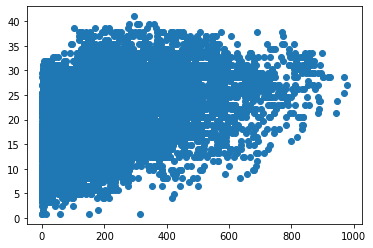

In [ ]:
plt.scatter(x='count', y='temp', data=df)
plt.show()

## Modeling

### Multiple Linear Regression (MLR)

In [287]:
df = pd.get_dummies(df, columns=["part_of_day"])

In [288]:
df.shape

(10886, 15)

In [289]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'count', 'part_of_day_Early Morning',
       'part_of_day_Eve', 'part_of_day_Late Night', 'part_of_day_Morning',
       'part_of_day_Night', 'part_of_day_Noon'],
      dtype='object')

In [290]:
X = df.drop(['count','datetime'], axis=1).values
y = df['count'].values

In [291]:
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [4., 0., 1., ..., 0., 1., 0.],
       [4., 0., 1., ..., 0., 1., 0.],
       [4., 0., 1., ..., 0., 1., 0.]])

In [292]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [293]:
X_train[0]

array([ 3.    ,  0.    ,  1.    ,  2.    , 27.06  , 61.    , 11.0014,
        0.    ,  0.    ,  0.    ,  1.    ,  0.    ,  0.    ])

In [294]:
#Scaling
mm = MinMaxScaler()
X_train[:, 4:7] = mm.fit_transform(X_train[:, 4:7])
X_test[:, 4:7]= mm.transform(X_test[:, 4:7])

In [295]:
X_train[0]

array([3.        , 0.        , 1.        , 2.        , 0.65306122,
       0.61      , 0.19301751, 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        ])

In [296]:
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [297]:
y_pred = slr.predict(X_test)

In [298]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.49251725135797486
MAE: 95.86948102789367
MSE: 17048.89527636216
RMSE: 130.57141829804164


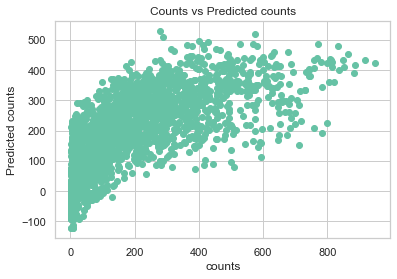

In [299]:
plt.scatter(y_test, y_pred)
plt.xlabel("counts")
plt.ylabel("Predicted counts")
plt.title("Counts vs Predicted counts")
plt.show()

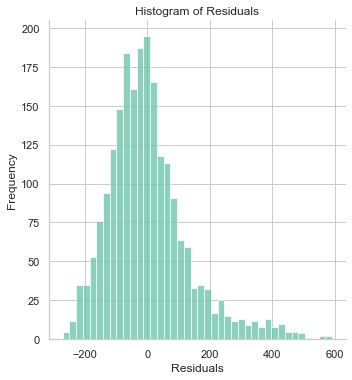

In [300]:
sns.displot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()